# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 69.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 70.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 71.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 62.4 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 71.6 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 65.9 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 60.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 77.4 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=0bdc39effbdc45f4522f8ac1c92b3eeef3a130c62c768fe7f20368dd634d0376
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#Define the device
device="cpu"
if torch.cuda.is_available():
    device="cuda"

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [7]:
# Define transforms, no need to normalize because every value is already between 0 and 1
transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ])


# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST("data/", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=300, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST("data/", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=300, shuffle=False)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

We don't need to normalize the data because every value it's between zero and one so it's a probability of being a filled pixel, the only transformation needed it's convert data to tensors.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        print(f'image.shape={image.shape}')
        
        plt.imshow(image.T.squeeze().T)
        plt.show()

Train Data Sample
2
image.shape=(1, 28, 28)


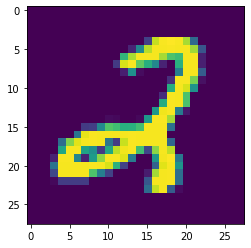

5
image.shape=(1, 28, 28)


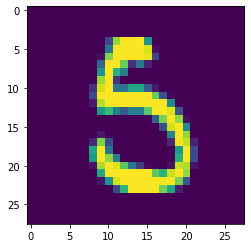

8
image.shape=(1, 28, 28)


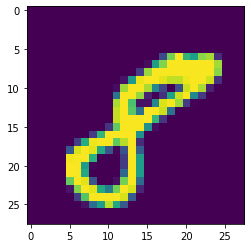

5
image.shape=(1, 28, 28)


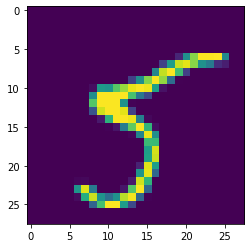

0
image.shape=(1, 28, 28)


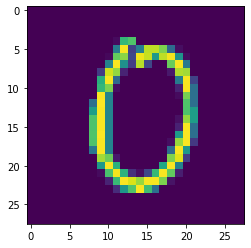

Test Data Sample
7
image.shape=(1, 28, 28)


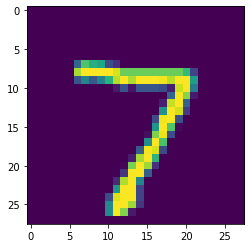

2
image.shape=(1, 28, 28)


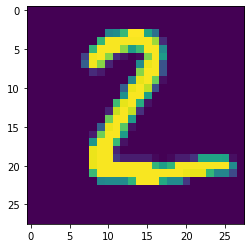

1
image.shape=(1, 28, 28)


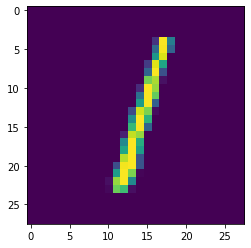

0
image.shape=(1, 28, 28)


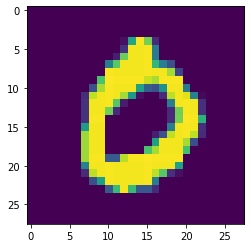

4
image.shape=(1, 28, 28)


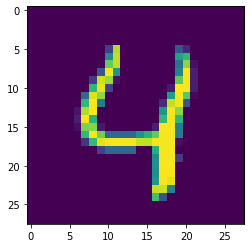

In [9]:
# Explore data
print("Train Data Sample")
show5(trainloader)

print("Test Data Sample")
show5(testloader)



## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
class Net(nn.Module):
    #we instantiate l1 as the shape of the hidden layer size for hyperparameter tunning later on
    def __init__(self, l1=300, l2=100, disable_dropout=False):
        super().__init__()
        self.disable_dropout = disable_dropout
        #we define the activation function
        self.softmax = F.softmax
        self.relu = F.relu
        
        #we create the initial size of 28x28x3, because we have that many pixels 
        self.layer1 = nn.Linear(28*28, l1, device=device)
        if not self.disable_dropout:
            #we add a dropout layer between the hidden layers with the probability of 20% 
            #because it significantly improve the accuracy in my tests
            self.dropout = nn.Dropout(.2)
        self.layer2 = nn.Linear(l1, l2, device=device)
        self.layer3 = nn.Linear(l2, 10, device=device)


    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.relu(self.layer1(x))
        if not self.disable_dropout:
            x = self.dropout(x)
        
        x = self.softmax(self.layer2(x),1)
        x = self.layer3(x)
        return x

# Instantiate the model
net = Net()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
def init_optimizer(lr=0.001):
    # We use Adam optimizer because is generally better than every other optimization algoritm
    # and we use it in the past excercise
    optimizer = optim.Adam(net.parameters(), lr)
    return optimizer

def init_loss_fn():
    # We use cross entrpoy loss because it's a classification problem 
    criterion = nn.CrossEntropyLoss()
    return criterion

optimizer = init_optimizer()
criterion = init_loss_fn()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
def compute_validations(net, testloader):
    # We calculate the validation accuracy and loss.
    val_loss = 0.0
    val_correct = 0
    batch_size_val = 0
    #we evaluate against our test set
    net.eval()
    for inputs, labels in testloader:
        #we ensure that if gpu is available we use it
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs.data, 1)

        #if predicted value is equal to expected value we increment val_correct
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
        batch_size_val += len(labels)

    #we compute the valudation accuracy and validation loss
    accuracy = 100*val_correct/batch_size_val
    computed_loss = val_loss/batch_size_val
    
    return accuracy, computed_loss
    
#we parametrize the training process for hyperparameter tunning later on 
def train_model(net, trainloader, optimizer, criterion, epochs=50, print_every_epochs = 2, print_progress=True):
    # We use the stats from our past excercise to save each epoch
    train_loss_history = list()
    val_loss_history = list()
    accuracy = 0
    computed_loss = 0

    for epoch in range(epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        batch_size = 0;

        #we compute stats number every n epochs to get the train process faster
        stats = (epoch+1) % print_every_epochs == 0

        #we iterate the trainloader data
        for i,data in enumerate(trainloader):

            #we split on inputs and labels the data
            inputs, labels = data

            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            #zero the gradients to ensure that we are not tracking unecessary information
            optimizer.zero_grad()

            #forward pass
            outputs = net(inputs)

            #compute our loss
            loss = criterion(outputs, labels)

            #backward pass
            loss.backward()

            #step the optimizer
            optimizer.step()

            if stats:
                # Compute the accuracy and print the accuracy and loss
                _, preds = torch.max(outputs.data, 1)

                train_correct += (preds == labels).sum()
                train_loss += loss.item()

                batch_size += len(labels)

        if stats:
            accuracy = 100*train_correct/batch_size
            computed_loss = train_loss/batch_size

            if print_progress:
                #we use this line adapted from the past excercise to print the training accuracy and the training loss
                print(f'Epoch {epoch + 1} training accuracy: {accuracy:.2f}% training loss: {computed_loss:.8f}')

            train_loss_history.append(computed_loss)

            accuracy, computed_loss = compute_validations(net, testloader)

            if print_progress:
                #we use this line from the past excercise to print the validation accuracy and the validation loss
                print(f'Epoch {epoch + 1} validation accuracy: {accuracy:.2f}% validation loss: {computed_loss:.8f}')

            val_loss_history.append(computed_loss)
            
    return train_loss_history, val_loss_history
    


In [13]:
train_loss_history, val_loss_history = train_model(net, trainloader, optimizer, criterion)

Epoch 2 training accuracy: 76.51% training loss: 0.00576797
Epoch 2 validation accuracy: 77.78% validation loss: 0.00537892
Epoch 4 training accuracy: 78.33% training loss: 0.00412982
Epoch 4 validation accuracy: 78.66% validation loss: 0.00387261
Epoch 6 training accuracy: 78.98% training loss: 0.00304413
Epoch 6 validation accuracy: 79.16% validation loss: 0.00290756
Epoch 8 training accuracy: 79.38% training loss: 0.00236349
Epoch 8 validation accuracy: 79.07% validation loss: 0.00231173
Epoch 10 training accuracy: 79.69% training loss: 0.00193641
Epoch 10 validation accuracy: 79.49% validation loss: 0.00193764
Epoch 12 training accuracy: 80.02% training loss: 0.00166226
Epoch 12 validation accuracy: 79.65% validation loss: 0.00170912
Epoch 14 training accuracy: 80.19% training loss: 0.00147837
Epoch 14 validation accuracy: 79.67% validation loss: 0.00155203
Epoch 16 training accuracy: 80.39% training loss: 0.00135407
Epoch 16 validation accuracy: 79.38% validation loss: 0.00147269


Plot the training loss (and validation loss/accuracy, if recorded).

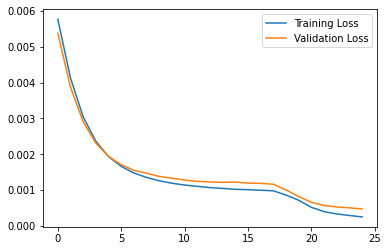

In [14]:
# Plot the training and validation loss history
def plot_history(train_loss_history, val_loss_history):
    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()
    
plot_history(train_loss_history, val_loss_history)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
# We calculate the validation accuracy and loss.
accuracy, computed_loss = compute_validations(net, testloader)


#we use this line from the past excercise to print the training accuracy and the training loss
print(f'Model validation accuracy: {accuracy:.2f}% validation loss: {computed_loss:.8f}')


Model validation accuracy: 97.73% validation loss: 0.00047556


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Let's tweak learning rate to see if there's any difference

Train batch complete: lr:0.003 accuracy:97.78, loss:0.0004079118906520307


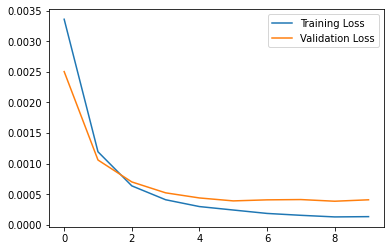

Train batch complete: lr:0.002 accuracy:79.02, loss:0.0013032851040363311


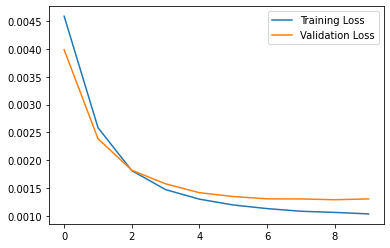

Train batch complete: lr:0.0015 accuracy:79.32, loss:0.0012575744330883027


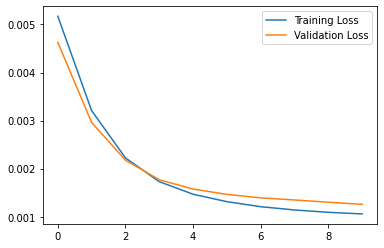

Train batch complete: lr:0.00125 accuracy:69.68, loss:0.0017717760473489762


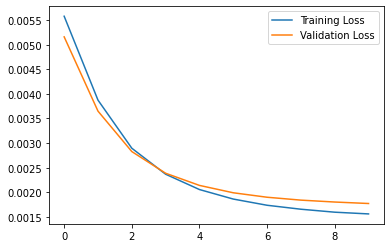

Train batch complete: lr:0.001 accuracy:79.74, loss:0.0013449392586946487


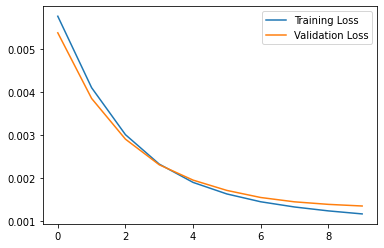

Train batch complete: lr:0.00075 accuracy:69.82, loss:0.0019634008705616


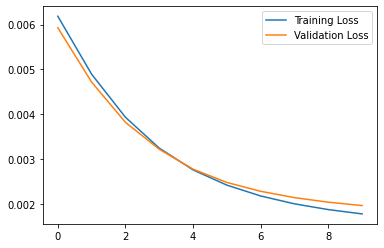

        lr  accuracy      loss
0  0.00300     97.78  0.000408
1  0.00200     79.02  0.001303
2  0.00150     79.32  0.001258
3  0.00125     69.68  0.001772
4  0.00100     79.74  0.001345
5  0.00075     69.82  0.001963


In [16]:
ranking_table = list()
test_epochs = 20
for lr in (0.003, 0.002, 0.0015, 0.00125, 0.001, 0.00075):
    
    #we create a new net disabling dropout to reduce the random behaviour to compare 
    #the results in a better way
    net = Net(300,100, disable_dropout=True)

    #we tweak the learning rate
    optimizer = init_optimizer(lr)

    criterion = init_loss_fn()
    train_loss_history, val_loss_history = train_model(net, trainloader, optimizer, criterion, epochs=test_epochs, print_every_epochs=2, print_progress=False)
    accuracy, computed_loss = compute_validations(net, testloader)

    print(f'Train batch complete: lr:{lr} accuracy:{accuracy}, loss:{computed_loss}');
    plot_history(train_loss_history, val_loss_history)
    ranking_table.append({"lr":lr, "accuracy":accuracy, "loss":computed_loss})

ranking_table_df = pd.DataFrame(ranking_table)
print(ranking_table_df)

Apparently our best lr value it's: 0.003

Now we will try to change the size of the hidden layers

Train batch complete: l1:600, l2:200, lr:0.003 accuracy:97.88, loss:0.0004271848176605999


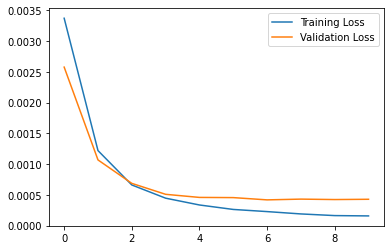

Train batch complete: l1:400, l2:150, lr:0.003 accuracy:97.74, loss:0.00039452049592509866


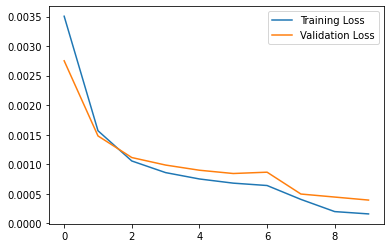

Train batch complete: l1:300, l2:100, lr:0.003 accuracy:97.39, loss:0.0004666853547096252


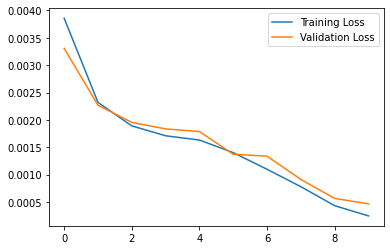

Train batch complete: l1:200, l2:75, lr:0.003 accuracy:97.52, loss:0.00043015216011554


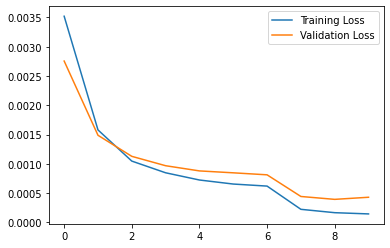

    l1   l2     lr  accuracy      loss
0  600  200  0.003     97.88  0.000427
1  400  150  0.003     97.74  0.000395
2  300  100  0.003     97.39  0.000467
3  200   75  0.003     97.52  0.000430


In [17]:
lr = 0.003
ranking_table = list()
test_epochs = 20
for l1, l2 in ((600,200), (400,150), (300,100), (200,75)):
    
    #we create a new net disabling dropout to reduce the random behaviour to compare 
    #the results in a better way
    net = Net(l1, l2, disable_dropout=True)

    #we tweak the learning rate
    optimizer = init_optimizer(lr)

    criterion = init_loss_fn()
    train_loss_history, val_loss_history = train_model(net, trainloader, optimizer, criterion, epochs=test_epochs, print_every_epochs=2, print_progress=False)
    accuracy, computed_loss = compute_validations(net, testloader)

    print(f'Train batch complete: l1:{l1}, l2:{l2}, lr:{lr} accuracy:{accuracy}, loss:{computed_loss}');
    plot_history(train_loss_history, val_loss_history)
    ranking_table.append({"l1":l1, "l2":l2, "lr":lr, "accuracy":accuracy, "loss":computed_loss})

ranking_table_df = pd.DataFrame(ranking_table)
print(ranking_table_df)

Apparently i'ts very similar the accuracy for any configuration.

Now let's do a full training again with those parameters

In [18]:
test_epochs = 16

l1 = 300
l2 = 100

#we do a full training with the tunning
net = Net(l1, l2)

#we use out best learling rate
optimizer = init_optimizer(lr)
criterion = init_loss_fn()

train_loss_history, val_loss_history = train_model(net, trainloader, optimizer, criterion, epochs=test_epochs, print_every_epochs=2)
accuracy, computed_loss = compute_validations(net, testloader)

Epoch 2 training accuracy: 68.21% training loss: 0.00388678
Epoch 2 validation accuracy: 68.31% validation loss: 0.00329461
Epoch 4 training accuracy: 69.21% training loss: 0.00236772
Epoch 4 validation accuracy: 69.22% validation loss: 0.00225037
Epoch 6 training accuracy: 69.72% training loss: 0.00196510
Epoch 6 validation accuracy: 70.03% validation loss: 0.00198346
Epoch 8 training accuracy: 75.68% training loss: 0.00167676
Epoch 8 validation accuracy: 79.79% validation loss: 0.00148218
Epoch 10 training accuracy: 80.10% training loss: 0.00126695
Epoch 10 validation accuracy: 79.35% validation loss: 0.00134916
Epoch 12 training accuracy: 90.62% training loss: 0.00082974
Epoch 12 validation accuracy: 96.26% validation loss: 0.00077283
Epoch 14 training accuracy: 98.06% training loss: 0.00037029
Epoch 14 validation accuracy: 97.27% validation loss: 0.00048267
Epoch 16 training accuracy: 98.43% training loss: 0.00027971
Epoch 16 validation accuracy: 97.81% validation loss: 0.00040424


Train batch complete: l1:300, l2:100, lr:0.003 accuracy:97.81, loss:0.00040424065236002206


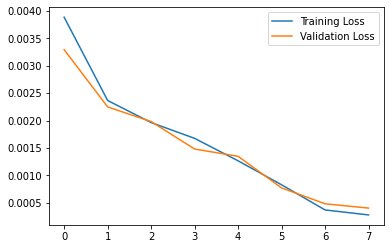

In [19]:
#plot accuracy

print(f'Train batch complete: l1:{l1}, l2:{l2}, lr:{lr} accuracy:{accuracy}, loss:{computed_loss}');
plot_history(train_loss_history, val_loss_history)

## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
# Save our model for further using
torch.save(net.state_dict(), "MINST_model.pt")